In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
X = np.asarray([
    [-1, 1],
    [0, 2],
    [1, 0],
    [1, 1]
], dtype=np.float)

In [3]:
y = np.asarray([0, 0, 1, 1], dtype=np.int)

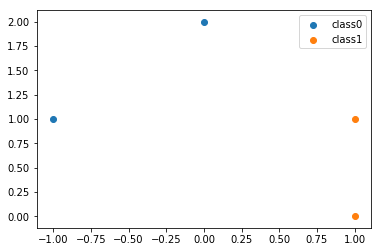

In [4]:
for label in [0, 1]:
    plt.scatter(X[y==label, 0], X[y==label, 1], label='class'+str(label))
plt.legend()

In [5]:
line1 = np.asarray([1, -1, 0.5], dtype=np.float)
line2 = np.asarray([2, -1, 0], dtype=np.float)

In [6]:
xs = np.linspace(-1, 1, 10)

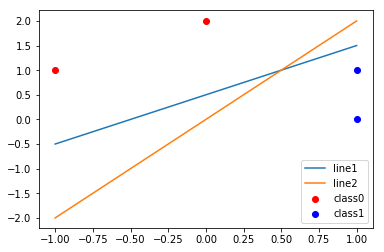

In [7]:
plt.scatter(X[y==0, 0], X[y==0, 1], label='class0', c='red')
plt.scatter(X[y==1, 0], X[y==1, 1], label='class1', c='blue')

for i, (w1, w2, b) in enumerate([line1, line2]):
    plt.plot(xs, (-b-w1*xs)/w2, label='line'+str(i+1))
    
plt.legend()

In [8]:
def predict(line, point):
    w1, w2, b = line
    x1, x2 = point
    
    s = w1*x1 + w2*x2 + b
    prob1 = 1/(1+np.exp(-s))
    prob0 = 1 - prob1
    return prob0, prob1

In [9]:
for point in X:
    print(predict(line1, point))

(0.8175744761936437, 0.18242552380635635)
(0.8175744761936437, 0.18242552380635635)
(0.18242552380635635, 0.8175744761936437)
(0.3775406687981454, 0.6224593312018546)


In [10]:
for point in X:
    print(predict(line2, point))

(0.9525741268224333, 0.04742587317756678)
(0.8807970779778824, 0.11920292202211755)
(0.11920292202211769, 0.8807970779778823)
(0.2689414213699951, 0.7310585786300049)


In [11]:
def likelihood(line, X, y):
    likelihood = 1
    for i in range(len(y)):
        point = X[i]
        label = y[i]
        
        probs = predict(line, point)
        
        likelihood *= probs[label]
    return likelihood

In [12]:
likelihood(line1, X, y), likelihood(line2, X, y)

(0.34016760800165546, 0.5402598447506067)

In [13]:
def grad_per_point(line, point, label):
    probs = predict(line, point)
    if label == 1:
        grad_b = probs[0] * probs[1]
    else:
        grad_b = - probs[0] * probs[1]
        
    x1, x2 = point
    grad_w1 = grad_b * x1
    grad_w2 = grad_b * x2
    
    return np.asarray([grad_w1, grad_w2, grad_b])

In [14]:
line3 = line2.copy().astype(np.float32)

In [15]:
grad = np.zeros(3)
for i in range(len(y)):
    grad += grad_per_point(line3, X[i], y[i])
print(grad)

[ 0.34678218 -0.0585519   0.15143527]


In [16]:
print(line3)
print(likelihood(line3, X, y))

line3 += 0.01 * grad

print(line3)
print(likelihood(line3, X, y))

[ 2. -1.  0.]
0.5402598447506067
[ 2.0034678e+00 -1.0005856e+00  1.5143527e-03]
0.5412615822927596


In [17]:
for k in range(100):
    grad = np.zeros(3)
    for i in range(len(y)):
        grad += grad_per_point(line3, X[i], y[i])
        
    line3 += 0.01 * grad
    
    w1, w2, b = line3
    sum_of_squares = w1*w1 + w2*w2
    if sum_of_squares >= 5:
        w1 *= np.sqrt(5/sum_of_squares)
        w2 *= np.sqrt(5/sum_of_squares)
    line3 = np.asarray([w1, w2, b])
    
    print(k, likelihood(line3, X, y))

0 0.5408160064700654
1 0.5410884546094343
2 0.5413572569292161
3 0.541622464084853
4 0.5418841263216566
5 0.5421422932928871
6 0.5423970140630039
7 0.5426483371110247
8 0.5428963103339891
9 0.5431409810505278
10 0.5433823960045208
11 0.5436206013688516
12 0.5438556427492447
13 0.5440875651881826
14 0.5443164131689028
15 0.5445422306194633
16 0.544765060916878
17 0.5449849468913135
18 0.5452019308303474
19 0.5454160544832803
20 0.5456273590655003
21 0.5458358852628931
22 0.5460416732363004
23 0.5462447626260157
24 0.5464451925563172
25 0.5466430016400377
26 0.5468382279831611
27 0.5470309091894513
28 0.5472210823651026
29 0.5474087841234125
30 0.5475940505894752
31 0.5477769174048892
32 0.5479574197324818
33 0.5481355922610415
34 0.5483114692100627
35 0.548485084334494
36 0.5486564709294939
37 0.5488256618351854
38 0.548992689441415
39 0.5491575856925044
40 0.5493203820920041
41 0.549481109707438
42 0.5496397991750404
43 0.5497964807044865
44 0.5499511840836093
45 0.5501039386831063
46 

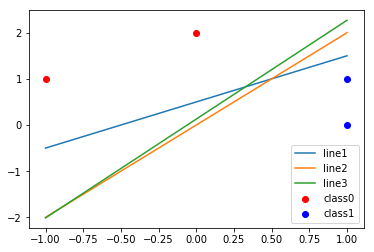

In [18]:
plt.scatter(X[y==0, 0], X[y==0, 1], label='class0', c='red')
plt.scatter(X[y==1, 0], X[y==1, 1], label='class1', c='blue')

for i, (w1, w2, b) in enumerate([line1, line2, line3]):
    plt.plot(xs, (-b-w1*xs)/w2, label='line'+str(i+1))
    
plt.legend()

In [19]:
import torch

torchX = torch.tensor(X)
torchY = torch.tensor(y)

line4 = torch.tensor(line2, requires_grad=True)

In [20]:
def predict_torch(line, point):
    w1, w2, b = line
    x1, x2 = point
    
    s = w1*x1 + w2*x2 + b
    prob1 = 1/(1+torch.exp(-s))
    prob0 = 1 - prob1
    return prob0, prob1

In [21]:
def log_likelihood_torch(line, X, y):
    log_likelihood = 0
    for i in range(len(y)):
        point = X[i]
        label = y[i]
        
        probs = predict_torch(line, point)
        
        log_likelihood += torch.log(probs[label])
    return log_likelihood

In [22]:
for k in range(100):
    ll = log_likelihood_torch(line4, torchX, torchY)
    
    print(k, ll.item())
    
    ll.backward()
    line4.data += 0.01 * line4.grad.data
    line4.grad.zero_()
    
    w1, w2, b = line4.data
    sum_of_squares = w1*w1 + w2*w2
    if sum_of_squares >= 5:
        w1 *= torch.sqrt(5/sum_of_squares)
        w2 *= torch.sqrt(5/sum_of_squares)

0 -0.61570506117791
1 -0.6148966863283157
2 -0.6141065435442292
3 -0.6133341933810564
4 -0.6125792068329475
5 -0.6118411650894232
6 -0.6111196592976926
7 -0.6104142903305143
8 -0.6097246685594664
9 -0.6090504136334962
10 -0.6083911542626113
11 -0.6077465280065986
12 -0.6071161810686394
13 -0.6064997680937061
14 -0.6058969519716237
15 -0.6053074036446863
16 -0.6047308019197144
17 -0.6041668332844512
18 -0.6036151917281912
19 -0.6030755785665445
20 -0.6025477022702304
21 -0.6020312782978166
22 -0.6015260289323008
23 -0.6010316831214493
24 -0.6005479763218018
25 -0.6000746503462612
26 -0.5996114532151795
27 -0.5991581390108598
28 -0.5987144677353975
29 -0.5982802051717792
30 -0.5978551227481708
31 -0.5974389974053105
32 -0.5970316114669463
33 -0.5966327525132413
34 -0.596242213257081
35 -0.5958597914232147
36 -0.5954852896301692
37 -0.5951185152748689
38 -0.5947592804199011
39 -0.5944074016833678
40 -0.5940627001312623
41 -0.5937250011723181
42 -0.5933941344552676
43 -0.593069933768466
44

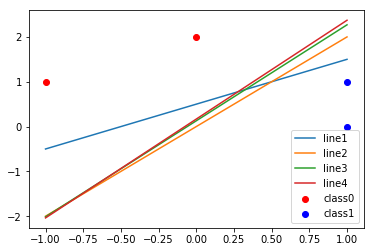

In [23]:
plt.scatter(X[y==0, 0], X[y==0, 1], label='class0', c='red')
plt.scatter(X[y==1, 0], X[y==1, 1], label='class1', c='blue')

for i, (w1, w2, b) in enumerate([line1, line2, line3, line4.data.numpy()]):
    plt.plot(xs, (-b-w1*xs)/w2, label='line'+str(i+1))
    
plt.legend()